### Practice for Python

This time you are going to write Python code yourself, performing data analysis and visualisation using Python and its libraries. You are going to read and plot Covid-19 data, comparing trends between different countries.

In [1]:
# Import libraries
import os
import urllib.request
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### 1. Download the latest Covid-19 data from John Hopkins Univeristy repository.

To understand more about this dataset, please refer to: https://github.com/CSSEGISandData/COVID-19

In [2]:
# The URL for Covid-19 statistics
URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'
f = '/time_series_covid19_confirmed_global.csv'

# Download csv files for confirmed case, death and recovered case data
print('Downloading csv files for confirmed case, death and recovered case data ...')
for f in ['time_series_covid19_confirmed_global.csv',
          'time_series_covid19_deaths_global.csv',
          'time_series_covid19_recovered_global.csv']:
    urllib.request.urlretrieve(URL + f, f)

# Download the csv file for country profiles
print('Downloading the csv file for country profiles ...')
URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/'
f = 'UID_ISO_FIPS_LookUp_Table.csv'
urllib.request.urlretrieve(URL + f, f)

('UID_ISO_FIPS_LookUp_Table.csv', <http.client.HTTPMessage at 0x7ff8ad6bf7f0>)

### 2. Read and show the confirmed cases for United Kingdom.

#### 2.1 Read the confirmed case csv file using Python pandas, print out its information.

In [3]:
# Read the csv file
f = 'time_series_covid19_confirmed_global.csv'
df = pd.read_csv(f)

# Print out the dataframe
print(df)

# Print out the column names
print(df.columns)

    Province/State      Country/Region        Lat       Long  1/22/20  \
0              NaN         Afghanistan  33.939110  67.709953        0   
1              NaN             Albania  41.153300  20.168300        0   
2              NaN             Algeria  28.033900   1.659600        0   
3              NaN             Andorra  42.506300   1.521800        0   
4              NaN              Angola -11.202700  17.873900        0   
..             ...                 ...        ...        ...      ...   
262            NaN  West Bank and Gaza  31.952200  35.233200        0   
263            NaN      Western Sahara  24.215500 -12.885800        0   
264            NaN               Yemen  15.552727  48.516388        0   
265            NaN              Zambia -13.133897  27.849332        0   
266            NaN            Zimbabwe -19.015438  29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  10/10/20  10/11/20  \
0          0        0        0        0       

#### 2.2 Select the UK Covid-19 data.

Note that there are several rows of UK data. We only analyse the whole UK data, not the regional data. For the whole UK data, 'Province/State' is NaN.

In [4]:
# Select the UK data.
# The first four columns denote province/state, country/region, latitude and longitude. The confirmed case data start from the 5-th column.
data = {}
data['United Kingdom'] = {}
data['United Kingdom']['Cumulative'] = df[(df['Country/Region'] == 'United Kingdom') & df['Province/State'].isna()].iloc[0, 4:]

#### 2.3 Plot the cummulative confirmed cases in the UK by date.

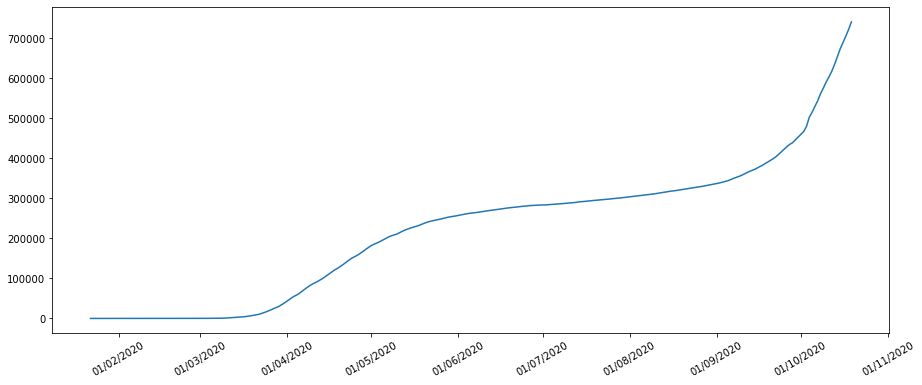

In [5]:
# Time axis
x = pd.to_datetime(data['United Kingdom']['Cumulative'].index)

# Cummulative cases
y = data['United Kingdom']['Cumulative']

# Plot
plt.plot(x, y)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.gca().xaxis.set_tick_params(rotation = 30)
plt.gcf().set_size_inches(15, 6)

#### 2.4 Plot the daily confirmed new cases in the UK by date.

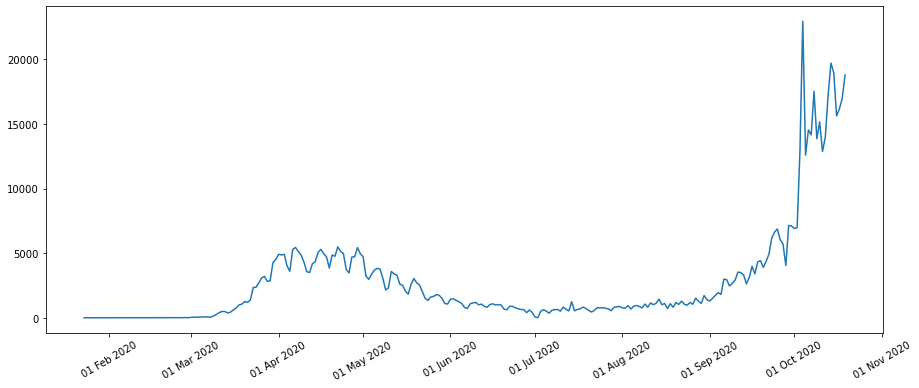

In [6]:
# Daily cases
data['United Kingdom']['Daily'] = data['United Kingdom']['Cumulative'].diff()
y = data['United Kingdom']['Daily']

# Plot
plt.plot(x, y)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d %b %Y'))
plt.gca().xaxis.set_tick_params(rotation = 30)
plt.gcf().set_size_inches(15, 6)

#### 2.5 Smooth the daily case curve using a moving average window of 7 days.

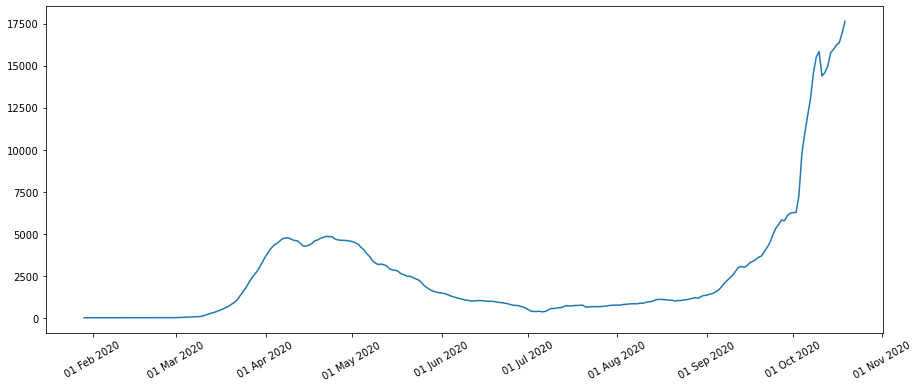

In [7]:
# Daily cases
data['United Kingdom']['Daily (MA7)'] = data['United Kingdom']['Daily'].rolling(7).mean()
y = data['United Kingdom']['Daily (MA7)']

# Plot
plt.plot(x, y)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d %b %Y'))
plt.gca().xaxis.set_tick_params(rotation = 30)
plt.gcf().set_size_inches(15, 6)

#### 2.6 Check the curve on https://coronavirus.data.gov.uk/cases. Does your curve look similar?

#### 2.7 Compare the daily confirmed new case curves of several countries, including United Kingdom, France, Italy and US. You may also add countries that you are interested in. Smooth using a 7-day moving average window.

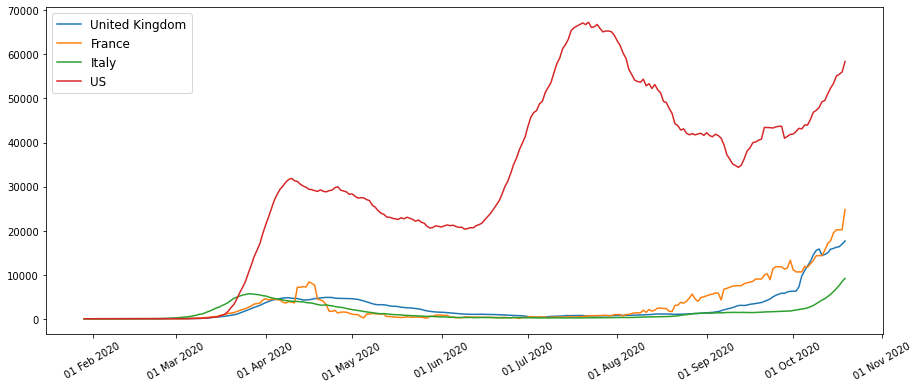

In [8]:
for country in ['United Kingdom', 'France', 'Italy', 'US']:
    data[country] = {}
    data[country]['Cumulative'] = df[(df['Country/Region'] == country) & df['Province/State'].isna()].iloc[0, 4:]
    data[country]['Daily'] = data[country]['Cumulative'].diff()
    data[country]['Daily (MA7)'] = data[country]['Daily'].rolling(7).mean()

for country in ['United Kingdom', 'France', 'Italy', 'US']:
    x = pd.to_datetime(data[country]['Daily (MA7)'].index)
    y = data[country]['Daily (MA7)']
    plt.plot(x, y, label=country)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d %b %Y'))
plt.gca().xaxis.set_tick_params(rotation = 30)
plt.gcf().set_size_inches(15, 6)
plt.legend(fontsize=12)

#### 2.8 Plot the curves of daily new cases (7-day moving averaged) per 100,000 population of these countries.
You can find the population information in the file UID_ISO_FIPS_LookUp_Table.csv.

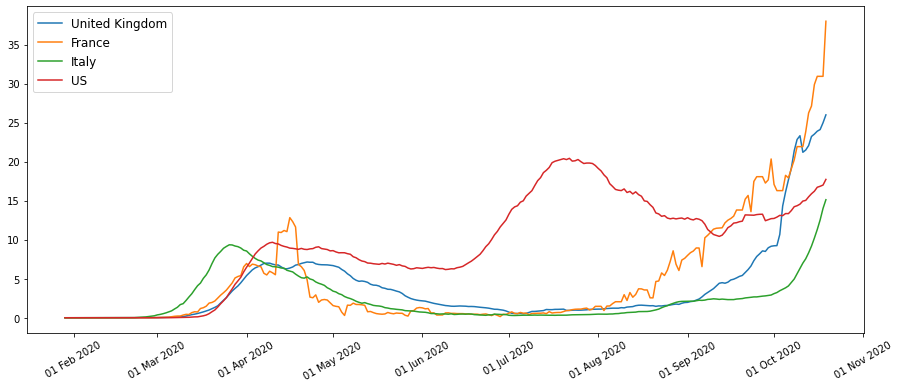

In [11]:
df_info = pd.read_csv('UID_ISO_FIPS_LookUp_Table.csv')

for country in ['United Kingdom', 'France', 'Italy', 'US']:
    data[country]['Population'] = df_info[(df_info['Country_Region'] == country) & df_info['Province_State'].isna()]['Population'].values
    data[country]['Daily Prevalence (MA7)'] = data[country]['Daily (MA7)'] / data[country]['Population'] * 100000
    
for country in ['United Kingdom', 'France', 'Italy', 'US']:
    x = pd.to_datetime(data[country]['Daily Prevalence (MA7)'].index)
    y = data[country]['Daily Prevalence (MA7)']
    plt.plot(x, y, label=country)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d %b %Y'))
plt.gca().xaxis.set_tick_params(rotation = 30)
plt.gcf().set_size_inches(15, 6)
plt.legend(fontsize=12)